##  We wish to evaluate the best six football clubs in the world: Real Madrid, Barcelona, Liverpool, Manchester City, PSG and Inter.

### We wish to support the winning odds of each team in a tournament of the best six teams. What we have is past score from previuos years at which this tournament took place.
  
### We want to infer a latent parameter - that is the 'strength' of a team based only on their **scoring intensity**, and all we have are their scores and results, we can't accurately measure the 'strength' of a team.


In [2]:
# imports
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns
import pickle as pkl
# from google.colab import drive
# drive.mount('/content/drive')

## The input   looks like as follows:

In [3]:
from google.colab import files
uploaded = files.upload()  # יפתח חלון בחירה לקובץ group_10.pkl מהמחשב שלך


Saving group_10.pkl to group_10.pkl


In [4]:
group = 10
filename = f"group_{group}.pkl"

with open(filename, 'rb') as f:
    df = pkl.load(f)

df.head(256)


,home_team,away_team,home_score,away_score,year
0,Liverpool,Barca,4,3,2014
1,Inter,ManC,5,6,2014
2,Real,PSG,5,1,2014
3,Real,Liverpool,5,0,2014
4,PSG,ManC,0,5,2014
5,Inter,Barca,6,2,2014
6,Liverpool,Inter,5,1,2014
7,Barca,PSG,4,5,2014
8,ManC,Real,2,2,2014
9,Real,Barca,9,1,2014


## We have home and away team, we have score and year.

## What is our goal?

### Our goal is to infer the latent variables—specifically, each team's strength—that give rise to the observed data, namely the scorelines. Since scorelines provide a noisy signal of team strength, we seek a model that allows us to effectively quantify the uncertainty surrounding these underlying strengths.



## Part 1

### We start by conducting an exploratory data analysis to gain an initial understanding of the underlying patterns and structure in the data.

## Tasks



### 1. (4%) Select your favorite team and compare its goal difference in home versus away matches. Is the team performing better at home or away? Visualize this by plotting a bar chart showing the goal difference for both home and away games.

### 2. (4%) Identify the team with the highest 75th percentile performance in away games. For each team, calculate the goal difference for all away matches (goals scored minus goals against) and determine the 75th value. Which team comes out on top?

### 3. (4%) Create a bar chart showing the goal difference for each team (i.e., total goals scored minus total goals against). Based on this plot, which team appears to be the strongest, and which one the weakest?

### 4. (4%) Generate the same bar chart over time for each team. Do any teams exhibit a clear trend, either improving or declining in performance?

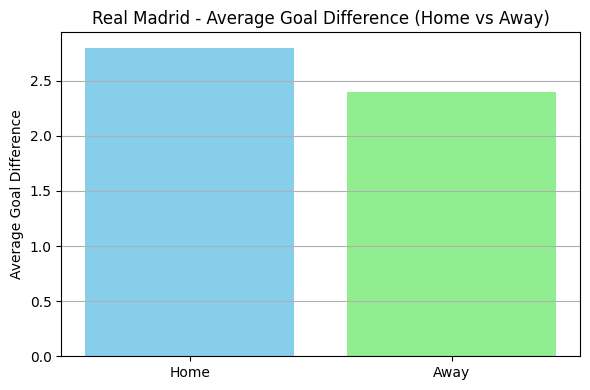

In [5]:
#1
# חישוב goal_diff אם לא קיימת
df["goal_diff"] = df["home_score"] - df["away_score"]

# סינון משחקים של ריאל מדריד בבית ובחוץ
real_home = df[df["home_team"] == "Real"]
real_away = df[df["away_team"] == "Real"]

# חישוב הפרש שערים ממוצע
real_home_diff = (real_home["home_score"] - real_home["away_score"]).mean()
real_away_diff = (real_away["away_score"] - real_away["home_score"]).mean()

# ציור גרף עמודות
plt.figure(figsize=(6, 4))
plt.bar(["Home", "Away"], [real_home_diff, real_away_diff], color=["skyblue", "lightgreen"])
plt.title("Real Madrid - Average Goal Difference (Home vs Away)")
plt.ylabel("Average Goal Difference")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


/tmp/ipython-input-6-3052242273.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x["away_score"] - x["home_score"]).quantile(0.75))
/tmp/ipython-input-6-3052242273.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=away_stats_df, x="team", y="75th_percentile_goal_diff", palette="Blues_d")


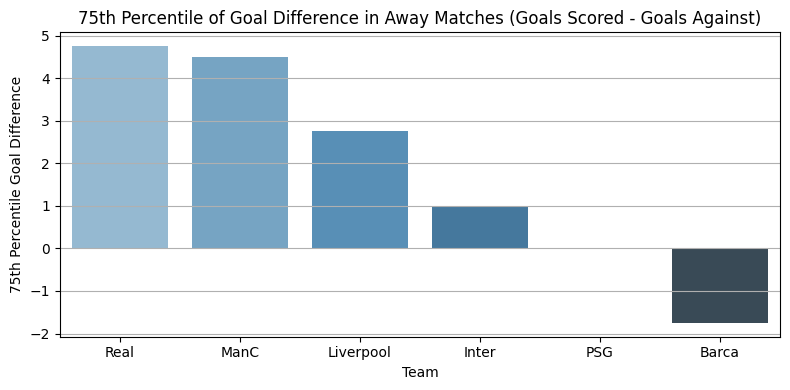

Top away team by 75th percentile goal difference: Real (4.75)


In [6]:
# חישוב אחוזון 75 של הפרש שערים עבור כל קבוצה במשחקי חוץ
away_stats = (
    df.groupby("away_team")
    .apply(lambda x: (x["away_score"] - x["home_score"]).quantile(0.75))
    .sort_values(ascending=False)
)

# יצירת DataFrame לתצוגה
away_stats_df = away_stats.reset_index()
away_stats_df.columns = ["team", "75th_percentile_goal_diff"]

# שרטוט גרף עמודות
plt.figure(figsize=(8, 4))
sns.barplot(data=away_stats_df, x="team", y="75th_percentile_goal_diff", palette="Blues_d")
plt.title("75th Percentile of Goal Difference in Away Matches (Goals Scored - Goals Against)")
plt.ylabel("75th Percentile Goal Difference")
plt.xlabel("Team")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# הצגת הקבוצה המובילה
top_team = away_stats.idxmax()
top_value = away_stats.max()
print(f"Top away team by 75th percentile goal difference: {top_team} ({top_value})")

/tmp/ipython-input-7-1164493124.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_diff_df, x="team", y="total_goal_diff", palette="coolwarm")


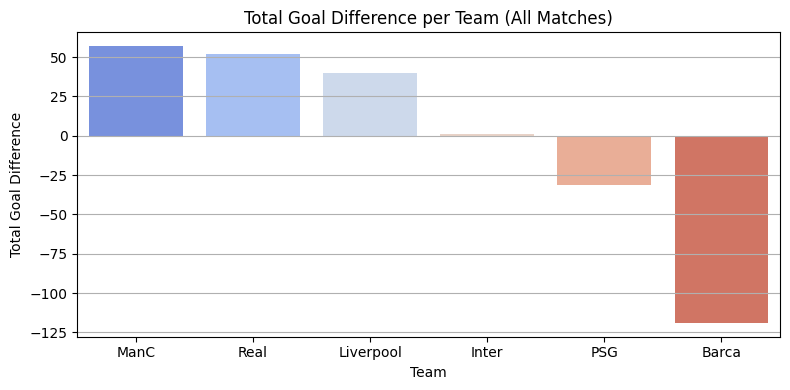

In [7]:
from collections import defaultdict

# חישוב סך הפרש שערים לכל קבוצה (בבית ובחוץ)
team_goal_diff = defaultdict(int)

for _, row in df.iterrows():
    team_goal_diff[row["home_team"]] += row["home_score"] - row["away_score"]
    team_goal_diff[row["away_team"]] += row["away_score"] - row["home_score"]

# הפיכה ל-DataFrame
team_diff_df = pd.DataFrame(team_goal_diff.items(), columns=["team", "total_goal_diff"])
team_diff_df = team_diff_df.sort_values(by="total_goal_diff", ascending=False)

# ציור גרף
plt.figure(figsize=(8, 4))
sns.barplot(data=team_diff_df, x="team", y="total_goal_diff", palette="coolwarm")
plt.title("Total Goal Difference per Team (All Matches)")
plt.ylabel("Total Goal Difference")
plt.xlabel("Team")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


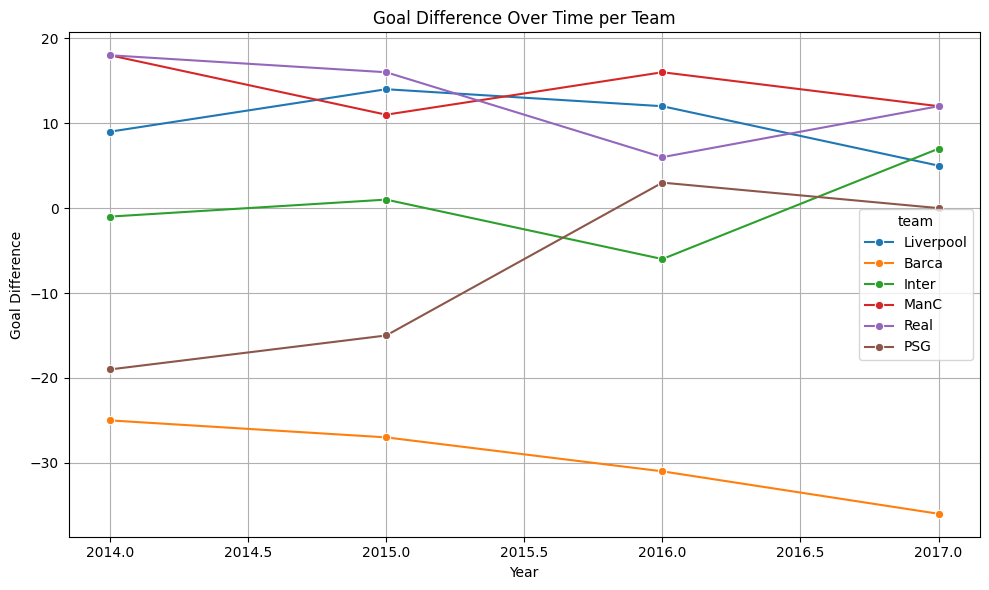

In [8]:
# חישוב הפרש שערים שנתי לכל קבוצה (כולל בית וחוץ)
from collections import defaultdict

yearly_diff = defaultdict(int)

for _, row in df.iterrows():
    year = row["year"]
    yearly_diff[(row["home_team"], year)] += row["home_score"] - row["away_score"]
    yearly_diff[(row["away_team"], year)] += row["away_score"] - row["home_score"]

# יצירת DataFrame
yearly_diff_df = pd.DataFrame(
    [(team, year, diff) for (team, year), diff in yearly_diff.items()],
    columns=["team", "year", "goal_diff"]
)

# ציור גרף קווים
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_diff_df, x="year", y="goal_diff", hue="team", marker="o")
plt.title("Goal Difference Over Time per Team")
plt.ylabel("Goal Difference")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()


## Part 2

## What assumptions do we know for our football competition?

### We know that there are 6 teams, each year all possible pairs playes once.  
### We have data from the last few years
### We also know that in sports scoring is modelled as a Poisson distribution.
### We consider home advantage to be a strong effect in sports

# Poisson regression


    
###   Poisson random variable measures the number of events for a single time unit
    
$$ Y\sim Pois(\lambda) $$
    
$$ P(Y=y) = \frac{e^{-\lambda}\lambda^y}{y!} $$
    
$$ E[Y] = V[Y] =\lambda $$
    

    
##  Poisson regression model looks like this:

## $$ (1) \quad  E[Y_i] = \lambda_i = e^{b_0 + b_1 X_{i,1} + b_2 X_{i,2}+...+ b_n X_{i,n}} $$
    
## $$  (2)  \quad  Log(E[Y_i]) = Log(\lambda_i) = b_0 + b_1 X_{i,1} + b_2 X_{i,2}+...+ b_n X_{i,n} $$
    
## $$ (3) \quad  Y_i ~\sim Pois(\lambda_i) $$
    
## i: the index of the instance we wish to infer
## $Y_i$: the value we wish to predict.
## $\lambda_i$: the expect value we wish to predict.
## $X_{i,j}$ the value of $i^{th}$ instace and the $j^{th}$ feature.
## $b_j$ is the parameter of the  $j^{th}$ feature.


## The model.

### The league is made up by a total of six teams, playing each other once in a season.

### The number of goals scored by the home and the away teams in the g-th game of the season (15 games) are notated by $y_{g_1}$ and $y_{g_2}$ respectively. </p>
### The vector of observed goal counts $\mathbb{y} = (y_{g_1}, y_{g_2})$ is modelled as independent Poisson:
## $$y_{g_j}| \delta{g_j} \tilde\;\;  Poisson(\delta{g_j})$$
### where the $\delta$ parameters represent the scoring intensity in the g-th game for the team playing at home (j=1) and away (j=2), respectively.</p>

## We model these parameters according to a formulation that has been used widely in the statistical literature, assuming a log-linear random effect model:
### $$ log \delta_{g_1} = intercept + home + \hat{att}_{h(g)} + \hat{def}_{a(g)} $$
### $$ log \delta_{g_2} = intercept + \hat{att}_{a(g)} + \hat{def}_{h(g)}$$


## Alternatively:

### $$  \delta_{g_1} = e^{ home + \hat{att}_{h(g)} + \hat{def}_{a(g)}} $$
### $$  \delta_{g_2} = e^{\hat{att}_{a(g)} + \hat{def}_{h(g)}}$$

### $\hat{att}_{h(g)}$ is the attack effect of a team.
### $\hat{def}_{h(g)}$ is the attack effect of a team.

### For team  i = 1, ..., 6, both  $\hat{att}_{i}$ and $\hat{def}_{i}$ are normalized values, fomrally:

### $$ \hat{att}_{i} = att_i - \bar{att} $$
### $$ \hat{def}_{i} = def_i - \bar{def} $$

where,

### $$ \bar{att}  = \frac{\sum_{i=1}^6 att_i}{6} $$
### $$ \bar{def}  = \frac{\sum_{i=1}^6 def_i}{6} $$

### Just for clarification: suppose we index teams as follows:
### 1: Real Madrid
### 2: Barcelona
### 3: Liverpool
### 4: Manchester City
### 5: PSG
### 6: Inter

### Now, suppose the first game is Real Madrid hosting Barcelona.
### Thus, $h(1) = 1 $ (i.e.,Real Madrid ) and $a(1) = 2 $ (i.e., Barcelona).

### The parameter home represents the advantage for the team hosting the game and we assume that this effect is constant for all the teams and throughout the season
### The scoring intensity is determined jointly by the attack and defense ability of the two teams involved, represented by the parameters att and def, respectively

### Conversely, for each i = 1, ..., 6, the player-specific effects are modelled as exchangeable from a common distribution:

### $att_{i} \; \tilde\;\; Normal(0,\tau_{att})$ and $def_{i} \; \tilde\;\;Normal(0,\tau_{def})$

### The log function to away scores and home scores is a standard trick in the sports analytics literature

## Tasks

### 1. (10%) Build a Hierarchical model with PyMc where you obtain a posterior of the latent variables: $home$, $att_i$,  and $def_i$ for $i = \{1,2,3,4,5,6\} $.
### Remark: Set the MCMC configuration regarding the number of draws, such that there will 4000 samples in total.



## guidence:
###  For the Hierarchical model, connect the different teams only via the attack and defence std (i.e., $\tau_{att}$ and $\tau_{def}$) and not the mean value.

## Indexing the data for the pymc model

In [9]:
df.head()

,home_team,away_team,home_score,away_score,year,goal_diff
0,Liverpool,Barca,4,3,2014,1
1,Inter,ManC,5,6,2014,-1
2,Real,PSG,5,1,2014,4
3,Real,Liverpool,5,0,2014,5
4,PSG,ManC,0,5,2014,-5


In [10]:
## for your convinience we have here the home and away index with respect to df.
home_idx, teams = pd.factorize(df["home_team"], sort=True)
away_idx, _ = pd.factorize(df["away_team"], sort=True)


In [11]:
df.head()

,home_team,away_team,home_score,away_score,year,goal_diff
0,Liverpool,Barca,4,3,2014,1
1,Inter,ManC,5,6,2014,-1
2,Real,PSG,5,1,2014,4
3,Real,Liverpool,5,0,2014,5
4,PSG,ManC,0,5,2014,-5


In [12]:
home_idx

array([2, 1, 5, 5, 4, 1, 2, 0, 3, 5, 4, 3, 0, 2, 1, 2, 0, 1, 3, 5, 4, 4,
       1, 5, 2, 3, 0, 0, 4, 3, 1, 4, 5, 1, 2, 0, 2, 0, 3, 5, 3, 4, 2, 5,
       1, 4, 3, 0, 0, 2, 1, 4, 5, 3, 2, 0, 3, 4, 1, 5])

In [13]:
import pytensor.tensor as at


coords = {"team": teams, 'home_idx': home_idx, 'away_idx': away_idx, "match": np.arange(len(df))}

with pm.Model(coords=coords) as football_model:

    # Hyperpriors
    tau_att = pm.HalfNormal("tau_att", sigma=1)
    tau_def = pm.HalfNormal("tau_def", sigma=1)

    # Priors

    home = pm.Normal("home", mu=0, sigma=1)
    att_raw = pm.Normal("att_raw", mu=0, sigma=1, dims="team")
    def_raw = pm.Normal("def_raw", mu=0, sigma=1, dims="team")

    # Centered data

    att_centered = pm.Deterministic("att", att_raw - at.mean(att_raw), dims="team")
    def_centered = pm.Deterministic("def", def_raw - at.mean(def_raw), dims="team")

    # Rate models
    home_score =  home +  att_centered[home_idx] + def_centered[away_idx]
    away_score =  att_centered[away_idx] + def_centered[home_idx]

    # Exp Rate models
    delta_g1 = pm.Deterministic("lambda_home", at.exp(home_score), dims="match")
    delta_g2 = pm.Deterministic("lambda_away", at.exp(away_score), dims="match")

    # Data likelihood for home and away
    y1_likelihood = pm.Poisson("y1", mu=delta_g1, observed=df["home_score"].values, dims="match")
    y2_likelihood = pm.Poisson("y2", mu=delta_g2, observed=df["away_score"].values, dims="match")


    trace  = pm.sample(draws=2000, tune=1000, chains=2, target_accept=0.9, return_inferencedata=True)



Output()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
home,1.17,0.07,1.03,1.30,0.0,0.0,3311.14,2320.01,1.0
att[Barca],-0.79,0.20,-1.16,-0.41,0.0,0.0,4633.56,2890.02,1.0
att[Inter],-0.06,0.13,-0.31,0.18,0.0,0.0,5019.15,3281.92,1.0
att[Liverpool],0.33,0.11,0.12,0.54,0.0,0.0,5411.82,3465.72,1.0
att[ManC],0.48,0.11,0.29,0.70,0.0,0.0,4769.55,3333.60,1.0
att[PSG],-0.19,0.14,-0.47,0.07,0.0,0.0,5229.75,3085.15,1.0
att[Real],0.22,0.12,0.01,0.44,0.0,0.0,5087.29,3260.78,1.0
def[Barca],0.97,0.10,0.79,1.15,0.0,0.0,4521.15,3393.59,1.0
def[Inter],0.01,0.14,-0.25,0.26,0.0,0.0,5440.66,2737.68,1.0
def[Liverpool],-0.22,0.15,-0.50,0.07,0.0,0.0,5098.19,2824.32,1.0


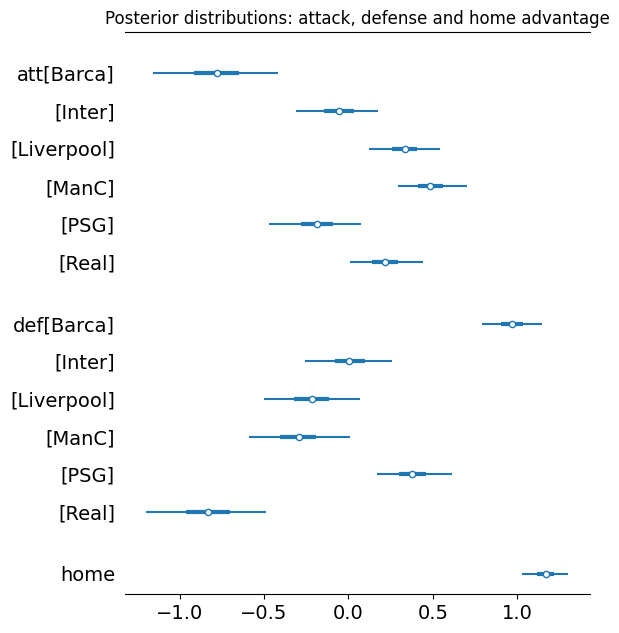

🔵 חוזק התקפי של הקבוצות:


,team,mean_att,att_lower,att_upper
0,Barca,-0.786,-1.158,-0.414
1,Inter,-0.059,-0.309,0.175
2,Liverpool,0.331,0.122,0.542
3,ManC,0.484,0.294,0.700
4,PSG,-0.186,-0.468,0.074
5,Real,0.217,0.007,0.444


🔴 חוזק הגנתי של הקבוצות:


,team,mean_def,def_lower,def_upper
0,Barca,0.969,0.793,1.147
1,Inter,0.006,-0.255,0.261
2,Liverpool,-0.221,-0.498,0.067
3,ManC,-0.297,-0.587,0.009
4,PSG,0.378,0.169,0.611
5,Real,-0.835,-1.200,-0.490



🏠 יתרון הביתיות (home) המוערך:
ממוצע: 1.17,  רווח סמך 94%: [1.03, 1.30]


In [14]:
# סיכום הפוסטריור לפרמטרים הלטנטיים
summary = az.summary(trace, var_names=["home", "att", "def"], hdi_prob=0.94, round_to=2)
display(summary)

# 🧠 תובנות נפרדות:
teams = sorted(df["home_team"].unique())


# סיכום התקפי
att_summary = az.summary(trace, var_names=["att"], hdi_prob=0.94)
att_summary["team"] = teams
att_summary = att_summary.reset_index(drop=True)

# סיכום הגנתי
def_summary = az.summary(trace, var_names=["def"], hdi_prob=0.94)
def_summary["team"] = teams
def_summary = def_summary.reset_index(drop=True)

# 🖼️ גרף Forestplot
az.plot_forest(trace, var_names=["att", "def", "home"], combined=True)
plt.title("Posterior distributions: attack, defense and home advantage")
plt.show()

# 📊 הצגת טבלת חוזק התקפי לפי קבוצה
print("🔵 חוזק התקפי של הקבוצות:")
display(att_summary[["team", "mean", "hdi_3%", "hdi_97%"]].rename(
    columns={"mean": "mean_att", "hdi_3%": "att_lower", "hdi_97%": "att_upper"})
)

# 📊 הצגת טבלת חוזק הגנתי לפי קבוצה
print("🔴 חוזק הגנתי של הקבוצות:")
display(def_summary[["team", "mean", "hdi_3%", "hdi_97%"]].rename(
    columns={"mean": "mean_def", "hdi_3%": "def_lower", "hdi_97%": "def_upper"})
)

# ⚽ יתרון ביתיות
home_summary = az.summary(trace, var_names=["home"], hdi_prob=0.94)
home_mean = home_summary.loc["home", "mean"]
home_hdi_low = home_summary.loc["home", "hdi_3%"]
home_hdi_high = home_summary.loc["home", "hdi_97%"]

print(f"\n🏠 יתרון הביתיות (home) המוערך:")
print(f"ממוצע: {home_mean:.2f},  רווח סמך 94%: [{home_hdi_low:.2f}, {home_hdi_high:.2f}]")


## Part 3

## We aim to understand the different distributions of attacking strength and defensive strength.
## These are probabilistic estimates and help us better understand the uncertainty in sports analytics.

## Tasks

### 1. (5%) Plot the attack and defence strenght HDI for each team and compare them. There should be two graphs, one with the attack HDI of all teams and the other with the defence HDI of all teams.  Which team has the best offence and which has the best defence? who has the worst offence and defence? Does these results is aligned with part 1 analysis?

### 2. (5%) Suppose Inter is hosting PSG for a game. What is the probability that PSG will score more than 3 goals?

### 3. (5%) What is the probability that Liverpool will host Barceolna and win by exactly 2 goals?

### 4. (5%) Simulate who wins over a total of 4000 simulations, one per sample in the posterior. Hint: use the sample_posterior_predictive function.
### The resulting simulation should give you the score per each game for all possible combinations for 4 seasons. For each sample out of the 4000 we can measure who will be ranked 1st, 2nd, etc. The ranking is done as follows:
### If a team wins he gets 3 points, draw a single point and lost 0 points. Sum up the points and you will get a full ranking. If we aggregate the results, we can the probability for each team for each position.

### You are required to draw a bar chart that indicates the probability of all possible ranks for each team.

/tmp/ipython-input-17-3853524702.py:23: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


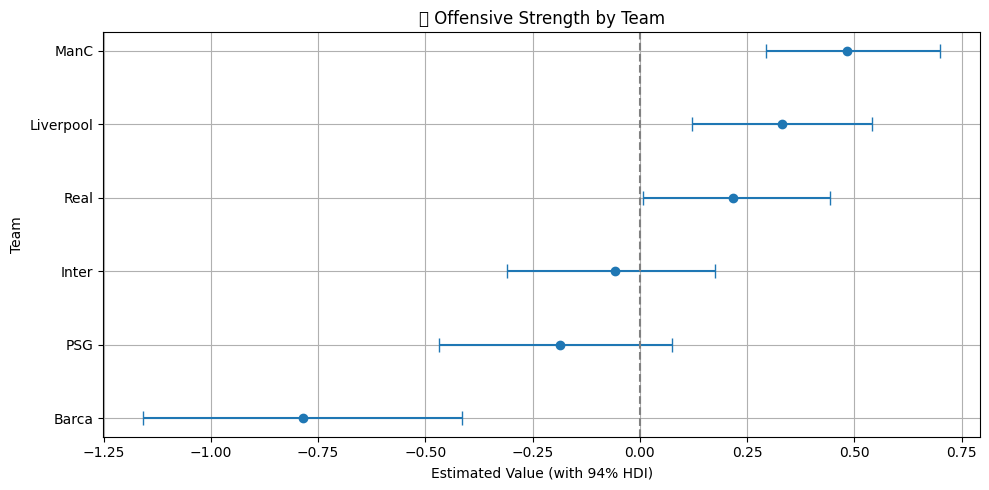

/tmp/ipython-input-17-3853524702.py:36: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


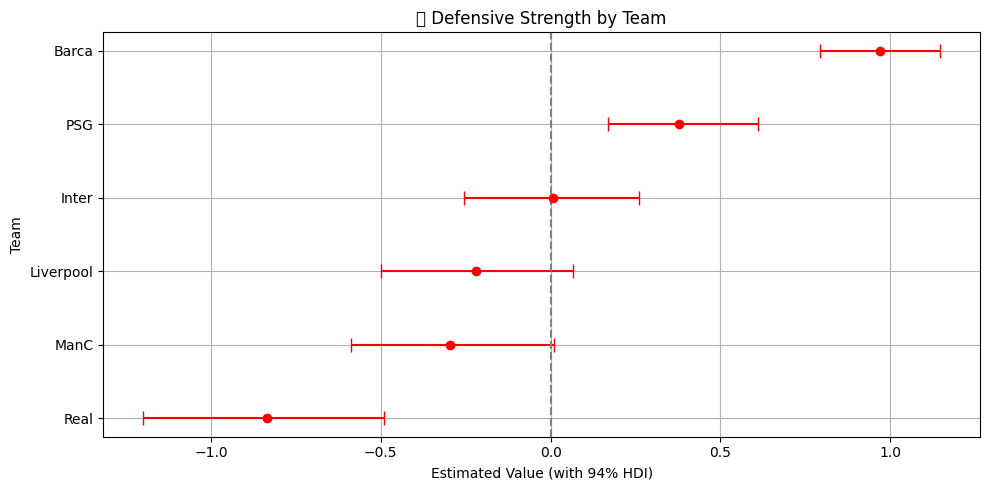

In [17]:
# שליפת סיכום משתנים מהפוסטריורי
summary = az.summary(trace, var_names=["att", "def"], hdi_prob=0.94)
summary = summary.reset_index().rename(columns={"index": "parameter"})

# חילוץ שמות הקבוצות מתוך הפרמטר
summary["team"] = summary["parameter"].str.extract(r'\[(.*)\]')
summary["type"] = summary["parameter"].str.extract(r'(att|def)')

# הפרדה בין התקפה להגנה
att_summary = summary[summary["type"] == "att"].sort_values("mean")
def_summary = summary[summary["type"] == "def"].sort_values("mean")

# Offensive Strength Graph
plt.figure(figsize=(10, 5))
plt.errorbar(att_summary["mean"], att_summary["team"],
             xerr=[att_summary["mean"] - att_summary["hdi_3%"], att_summary["hdi_97%"] - att_summary["mean"]],
             fmt='o', capsize=5)
plt.axvline(0, color='gray', linestyle='--')
plt.title("🔵 Offensive Strength by Team")
plt.xlabel("Estimated Value (with 94% HDI)")
plt.ylabel("Team")
plt.grid(True)
plt.tight_layout()
plt.show()

# Defensive Strength Graph
plt.figure(figsize=(10, 5))
plt.errorbar(def_summary["mean"], def_summary["team"],
             xerr=[def_summary["mean"] - def_summary["hdi_3%"], def_summary["hdi_97%"] - def_summary["mean"]],
             fmt='o', capsize=5, color="red")
plt.axvline(0, color='gray', linestyle='--')
plt.title("🔴 Defensive Strength by Team")
plt.xlabel("Estimated Value (with 94% HDI)")
plt.ylabel("Team")
plt.grid(True)
plt.tight_layout()
plt.show()




###  Strength Analysis Summary

* **Best offensive team:** **Manchester City** – They have the highest estimated attacking strength and the narrowest HDI, indicating consistent performance.

* **Weakest offensive team:** **Barcelona** – They have the lowest attacking strength with a wide uncertainty interval.

* **Best defensive team:** **Real Madrid** – They have the lowest defensive value (strongest defense).

* **Weakest defensive team:** **Barcelona** – They have the highest defensive value (weakest defense).

* **Comparison to Part 1 (EDA):**
  These results **align well** with the exploratory data analysis. Manchester City and Real Madrid showed strong goal differences in Part 1, and Barcelona performed poorly both in attack and defense, which is consistent with their low goal differences observed earlier.



In [19]:

import scipy.stats as stats

# חילוץ הדגימות מהפוסטריורי
att_psg = trace.posterior["att"].sel(team="PSG").values.flatten()
def_inter = trace.posterior["def"].sel(team="Inter").values.flatten()
home_adv = trace.posterior["home"].values.flatten()

# PSG is away team → אין home advantage עבורה
# Inter is home → PSG תוקפת מול ההגנה של אינטר
# λ_PSG = exp(att_PSG + def_Inter)
lambda_psg = np.exp(att_psg + def_inter)

# הסתברות ש- PSG תבקיע יותר מ-3 שערים
prob_psg_more_than_3 = 1 - stats.poisson.cdf(3, mu=lambda_psg)

# ממוצע ההסתברויות על פני כל הדגימות
final_prob = np.mean(prob_psg_more_than_3)

print(f"Estimated probability that PSG will score more than 3 goals against Inter: {final_prob:.3f}")


Estimated probability that PSG will score more than 3 goals against Inter: 0.013


In [20]:
from scipy.stats import poisson

# שליפת ערכים מהפוסטריורי
att_liv = trace.posterior["att"].sel(team="Liverpool").values.flatten()
def_bar = trace.posterior["def"].sel(team="Barca").values.flatten()
att_bar = trace.posterior["att"].sel(team="Barca").values.flatten()
def_liv = trace.posterior["def"].sel(team="Liverpool").values.flatten()
home = trace.posterior["home"].values.flatten()

# חישוב λ
lambda_liv = np.exp(home + att_liv + def_bar)
lambda_bar = np.exp(att_bar + def_liv)

# מקסימום שערים שנבדוק (למניעת לולאה אינסופית)
max_goals = 10
probs = []

# עבור כל דגימה נחשב את ההסתברות להפרש של 2 שערים
for lam_l, lam_b in zip(lambda_liv, lambda_bar):
    p = 0
    for x in range(max_goals):
        y = x - 2  # בדיוק 2 יותר
        if y >= 0:
            p += poisson.pmf(x, lam_l) * poisson.pmf(y, lam_b)
    probs.append(p)

# ממוצע הסתברות
final_prob = np.mean(probs)
print(f"Probability that Liverpool will beat Barcelona by exactly 2 goals: {final_prob:.3f}")


Probability that Liverpool will beat Barcelona by exactly 2 goals: 0.002


Output()

/tmp/ipython-input-26-4186856270.py:55: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


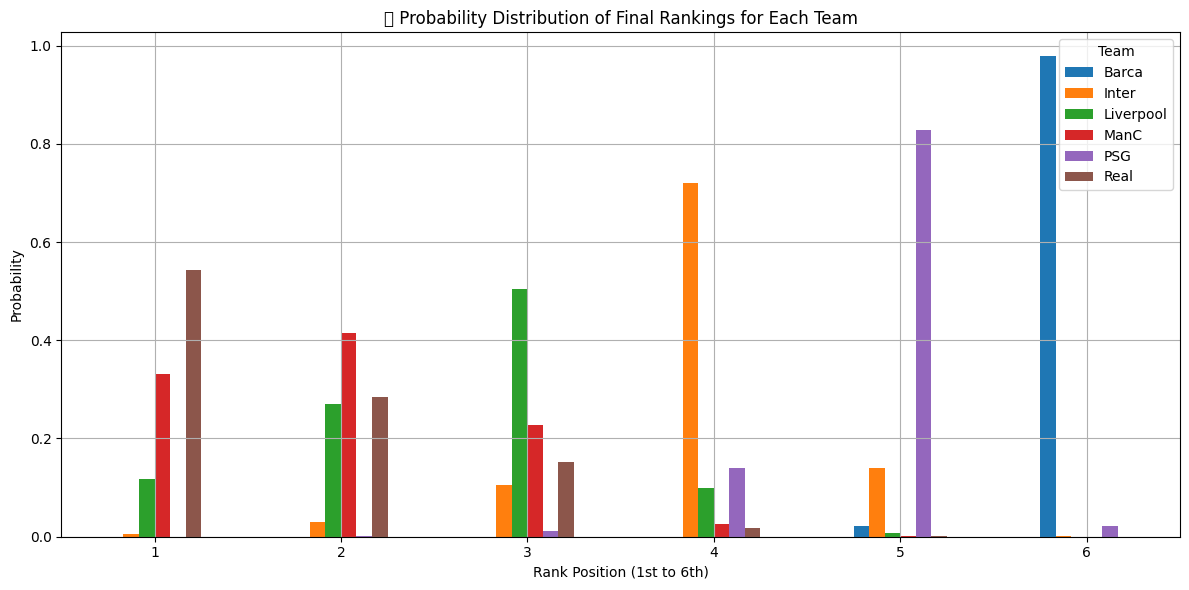

In [26]:
from pymc.sampling import sample_posterior_predictive

# Step 1: Sample predicted λ from the posterior
with football_model:
    ppc = sample_posterior_predictive(trace, var_names=["lambda_home", "lambda_away"])

# Step 2: Extract and reshape posterior predictive values
lambda_home_vals = ppc.posterior_predictive["lambda_home"].values  # shape: (chains, draws, matches)
lambda_away_vals = ppc.posterior_predictive["lambda_away"].values

# Combine chains and draws into single axis (samples)
n_simulations = lambda_home_vals.shape[0] * lambda_home_vals.shape[1]
lambda_home_flat = lambda_home_vals.reshape(-1, lambda_home_vals.shape[-1])  # shape: (n_simulations, matches)
lambda_away_flat = lambda_away_vals.reshape(-1, lambda_away_vals.shape[-1])

# Step 3: Simulate goals from Poisson
home_goals_sim = np.random.poisson(lambda_home_flat)
away_goals_sim = np.random.poisson(lambda_away_flat)

# Step 4: Initialize points matrix
teams_list = list(teams)
points_matrix = np.zeros((n_simulations, len(teams_list)))  # [simulation x team]

# Step 5: Assign points per match
for i in range(len(df)):
    h_idx = home_idx[i]
    a_idx = away_idx[i]
    h_goals = home_goals_sim[:, i]
    a_goals = away_goals_sim[:, i]

    points_matrix[:, h_idx] += 3 * (h_goals > a_goals) + 1 * (h_goals == a_goals)
    points_matrix[:, a_idx] += 3 * (a_goals > h_goals) + 1 * (a_goals == h_goals)

# Step 6: Calculate rankings
ranks = np.argsort(-points_matrix, axis=1)  # Higher points = better rank
rank_probs = pd.DataFrame(0, index=teams_list, columns=range(1, 7))

for sim in range(n_simulations):
    for place, team_idx in enumerate(ranks[sim]):
        team_name = teams_list[team_idx]
        rank_probs.loc[team_name, place + 1] += 1

rank_probs = rank_probs.divide(n_simulations)

# Step 7: Plot rank probabilities
import matplotlib.pyplot as plt

rank_probs.T.plot(kind='bar', figsize=(12, 6))
plt.title("📊 Probability Distribution of Final Rankings for Each Team")
plt.xlabel("Rank Position (1st to 6th)")
plt.ylabel("Probability")
plt.xticks(rotation=0)
plt.legend(title="Team")
plt.grid(True)
plt.tight_layout()
plt.show()


## Your code and answers here